# Install Packages

In [ ]:
#install dan import sastrawi package
!pip install Sastrawi
!pip install swifter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 2.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 490.6/490.6 kB 11.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 76.1 MB/s eta 0:00:00
  Created wheel for swifter: filename=swifter-1.3.5-py3-none-any.whl size=16518 sha256=8a66ddd989c103c0d14fde6eb9127b930eb4c82d02569a91b0ad85a8533b6617
  Stored in directory: /root/.cache/pip/wheels/00/7e/8c/438ea309a16ef1a9130849060f962e0d2c4e94b8a4314d5919
Successfully built swifter


In [ ]:
#install Tfidf dan split data package
!pip install sklearn
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install WordCloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Import Library

In [ ]:
import pandas as pd
import numpy as np
import csv
import string
import re #regex library

#import word tokenize & freqDist from NLTK
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords

#import sastrawi package
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter #mempercepat proses stemming

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import normalize

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score, f1_score
from nltk.metrics.scores import precision

import tensorflow as tf
import random as python_random
!pip install keras
!pip install tensorflow
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'whitegrid')
import datetime as dt
import tensorflow as tf
tf.random.set_seed(0)
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.wrappers.scikit_learn import KerasClassifier
from mlxtend.plotting import plot_confusion_matrix
from keras.backend import clear_session
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Load Data

In [ ]:
data = pd.read_csv("/content/Text_Preprocessing6.csv")

# Stopword Removal

In [ ]:
import ast
from nltk.corpus import stopwords

# ----------------------- get stopword from NLTK stopword -------------------------------
# get stopword indonesia
list_stopwords = stopwords.words('indonesian')


# ---------------------------- manualy add stopword  ------------------------------------
# append additional stopword
list_stopwords.extend(['meng', 'nya', 'di', 'an'])

# ----------------------- add stopword from txt file ------------------------------------
# read txt stopword using pandas
txt_stopword = pd.read_csv("stopwords-id.txt", names= ["stopwords"], header = None)

# convert stopword string to list & append additional stopword
list_stopwords.extend(txt_stopword["stopwords"][0].split(' '))

# ---------------------------------------------------------------------------------------

# convert list to dictionary
list_stopwords = set(list_stopwords)


#remove stopword pada list token
def stopwords_removal(words):
    return [word for word in ast.literal_eval(words) if word not in list_stopwords]

data['review_tokens_WSW'] = data['review_clean'].apply(stopwords_removal)

print(data['review_tokens_WSW'])

0                    [jaringan, stabil, aplikasi, stabil]
1                [masuk, masuk, tekan, tautan, pertemuan]
2         [chat, ponsel, seminggu, ponsel, ribet, laptop]
3                    [bagus, tingkat, fitur, tampilannya]
4                                                 [bagus]
                              ...                        
3582                                              [bagus]
3583    [dicoba, berkali, kode, kirimkan, nomor, telepon]
3584                    [sebal, jaringan, jelek, dipakai]
3585                                             [mantap]
3586                 [aplikasi, bagus, terkadang, lambat]
Name: review_tokens_WSW, Length: 3587, dtype: object


# Stemming

In [ ]:
# import Sastrawi package
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter

# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in data['review_tokens_WSW']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '

print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])

print(term_dict)
print("------------------------")


# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

data['review_tokens_stemmed'] = data['review_tokens_WSW'].swifter.apply(get_stemmed_term)
print(data['review_tokens_stemmed'])

1628
------------------------
jaringan : jaring
stabil : stabil
aplikasi : aplikasi
masuk : masuk
tekan : tekan
tautan : taut
pertemuan : temu
chat : chat
ponsel : ponsel
seminggu : minggu
ribet : ribet
laptop : laptop
bagus : bagus
tingkat : tingkat
fitur : fitur
tampilannya : tampil
oke : oke
ganggu : ganggu
banget : banget
membantu : bantu
pekerjaan : kerja
mantap : mantap
whatsapp : whatsapp
sekolah : sekolah
tau : tau
coba : coba
aplikasinya : aplikasi
yuk : yuk
hi : hi
teams : teams
kolega : kolega
kirim : kirim
menerima : terima
tolong : tolong
dukungannya : dukung
asap : asap
cek : cek
berkali : kali
terima : terima
kasih : kasih
iya : iya
suka : suka
pacar : pacar
bermanfaat : manfaat
pembelajaran : ajar
tugas : tugas
dapatkan : dapat
pokoknya : pokok
terbaik : baik
sejagat : jagat
raya : raya
indonesia : indonesia
pertiwi : pertiwi
salut : salut
deh : deh
semoga : moga
kedepan : depan
karakter : karakter
mengirim : kirim
stiker : stiker
menemani : tani
juli : juli
unik : unik

Pandas Apply:   0%|          | 0/3587 [00:00<?, ?it/s]

0                  [jaring, stabil, aplikasi, stabil]
1                   [masuk, masuk, tekan, taut, temu]
2       [chat, ponsel, minggu, ponsel, ribet, laptop]
3                     [bagus, tingkat, fitur, tampil]
4                                             [bagus]
                            ...                      
3582                                          [bagus]
3583        [coba, kali, kode, kirim, nomor, telepon]
3584                    [sebal, jaring, jelek, pakai]
3585                                         [mantap]
3586             [aplikasi, bagus, terkadang, lambat]
Name: review_tokens_stemmed, Length: 3587, dtype: object


In [ ]:
data.to_csv("text_preprop-stop-stem6.csv")

In [ ]:
data

,Unnamed: 0,content,case_folding,number,punctuation,no_emoticons,whitespace_multiple,review_tokens,review_clean,review_tokens_WSW,review_tokens_stemmed
0,0,Kenapa jaringan selalu tidak setabil padahal a...,kenapa jaringan selalu tidak setabil padahal a...,kenapa jaringan selalu tidak setabil padahal a...,kenapa jaringan selalu tidak setabil padahal a...,kenapa jaringan selalu tidak setabil padahal a...,kenapa jaringan selalu tidak setabil padahal a...,"['kenapa', 'jaringan', 'selalu', 'tidak', 'set...","['kenapa', 'jaringan', 'selalu', 'tidak', 'sta...","[jaringan, stabil, aplikasi, stabil]","[jaring, stabil, aplikasi, stabil]"
1,1,Sudah login tp minta login lagi ketika klik li...,sudah login tp minta login lagi ketika klik li...,sudah login tp minta login lagi ketika klik li...,sudah login tp minta login lagi ketika klik li...,sudah login tp minta login lagi ketika klik li...,sudah login tp minta login lagi ketika klik li...,"['sudah', 'login', 'tp', 'minta', 'login', 'la...","['sudah', 'masuk', 'tapi', 'meminta', 'masuk',...","[masuk, masuk, tekan, tautan, pertemuan]","[masuk, masuk, tekan, taut, temu]"
2,2,Saya tidak bisa melihat chat d hp saya.. Saya ...,saya tidak bisa melihat chat d hp saya.. saya ...,saya tidak bisa melihat chat d hp saya.. saya ...,saya tidak bisa melihat chat d hp saya saya su...,saya tidak bisa melihat chat d hp saya saya su...,saya tidak bisa melihat chat d hp saya saya su...,"['saya', 'tidak', 'bisa', 'melihat', 'chat', '...","['saya', 'tidak', 'bisa', 'melihat', 'chat', '...","[chat, ponsel, seminggu, ponsel, ribet, laptop]","[chat, ponsel, minggu, ponsel, ribet, laptop]"
3,3,Sangat bagus tingkat kan lagi fitur tampilannya.,sangat bagus tingkat kan lagi fitur tampilannya.,sangat bagus tingkat kan lagi fitur tampilannya.,sangat bagus tingkat kan lagi fitur tampilannya,sangat bagus tingkat kan lagi fitur tampilannya,sangat bagus tingkat kan lagi fitur tampilannya,"['sangat', 'bagus', 'tingkat', 'kan', 'lagi', ...","['sangat', 'bagus', 'tingkat', 'kan', 'lagi', ...","[bagus, tingkat, fitur, tampilannya]","[bagus, tingkat, fitur, tampil]"
4,4,Bagus,bagus,bagus,bagus,bagus,bagus,['bagus'],['bagus'],[bagus],[bagus]
...,...,...,...,...,...,...,...,...,...,...,...
3582,3582,Sangat bagus....,sangat bagus....,sangat bagus....,sangat bagus,sangat bagus,sangat bagus,"['sangat', 'bagus']","['sangat', 'bagus']",[bagus],[bagus]
3583,3583,Sudah dicoba berkali2. Kode tidak dirimkan ke ...,sudah dicoba berkali2. kode tidak dirimkan ke ...,sudah dicoba berkali. kode tidak dirimkan ke n...,sudah dicoba berkali kode tidak dirimkan ke no...,sudah dicoba berkali kode tidak dirimkan ke no...,sudah dicoba berkali kode tidak dirimkan ke no...,"['sudah', 'dicoba', 'berkali', 'kode', 'tidak'...","['sudah', 'dicoba', 'berkali', 'kode', 'tidak'...","[dicoba, berkali, kode, kirimkan, nomor, telepon]","[coba, kali, kode, kirim, nomor, telepon]"
3584,3584,Agak sebel jaringan sedikit jelek gak bisa dip...,agak sebel jaringan sedikit jelek gak bisa dip...,agak sebel jaringan sedikit jelek gak bisa dip...,agak sebel jaringan sedikit jelek gak bisa dip...,agak sebel jaringan sedikit jelek gak bisa dip...,agak sebel jaringan sedikit jelek gak bisa dip...,"['agak', 'sebel', 'jaringan', 'sedikit', 'jele...","['agak', 'sebal', 'jaringan', 'sedikit', 'jele...","[sebal, jaringan, jelek, dipakai]","[sebal, jaring, jelek, pakai]"
3585,3585,Mantap,mantap,mantap,mantap,mantap,mantap,['mantap'],['mantap'],[mantap],[mantap]


# Combine Stemming Result & Label

In [ ]:
#menggabungkan review stemmed dan label sentimen
import pandas as pd
import numpy as np

data1 = pd.read_csv("/content/text_preprop-stop-stem6.csv", usecols=["review_tokens_stemmed"])
data2 = pd.read_csv("/content/Text_Label6.csv")

dataset = pd.concat([data1, data2],axis=1, join='inner')
dataset

,review_tokens_stemmed,sentimen
0,"['jaring', 'stabil', 'aplikasi', 'stabil']",1
1,"['masuk', 'masuk', 'tekan', 'taut', 'temu']",1
2,"['chat', 'ponsel', 'minggu', 'ponsel', 'ribet'...",0
3,"['bagus', 'tingkat', 'fitur', 'tampil']",1
4,['bagus'],1
...,...,...
3582,['bagus'],1
3583,"['coba', 'kali', 'kode', 'kirim', 'nomor', 'te...",1
3584,"['sebal', 'jaring', 'jelek', 'pakai']",0
3585,['mantap'],1


In [ ]:
dataset.to_csv("Text_stop-stem-label6.csv")

# TF-IDF WEIGHTING

In [ ]:
dataset = pd.read_csv("/content/Text_stop-stem-label6.csv", usecols=["review_tokens_stemmed", "sentimen"])
dataset.columns = ["review", "sentimen"]

# Mengubah list token menjadi dokumen string
import ast

def join_text_list(texts):
    texts = ast.literal_eval(texts)
    return ' '.join([text for text in texts])
dataset["review_join"] = dataset["review"].apply(join_text_list)

# VEKTORISASI

max_features = None

# calc TF vector
cvect = CountVectorizer(max_features=max_features)
TF_vector = cvect.fit_transform(dataset["review_join"])

# normalize TF vector
normalized_TF_vector = normalize(TF_vector, norm='l1', axis=1)

# calc IDF
tfidf = TfidfVectorizer(max_features=max_features, smooth_idf=False)
tfs = tfidf.fit_transform(dataset["review_join"])
IDF_vector = tfidf.idf_

# hitung TF x IDF sehingga dihasilkan TFIDF matrix / vector
tfidf_mat = normalized_TF_vector.multiply(IDF_vector).toarray()

a=tfidf.get_feature_names_out()
b=tfs.toarray()

TfidfVektor= pd.DataFrame(data=tfidf_mat, columns=[a])
TfidfVektor

,abad,abang,abc,absen,acara,aco,ada,adik,admin,aduh,...,ya,yayaya,yeah,yeay,yemete,yey,youtube,yuk,zaman,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3582,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3584,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
TfidfVektor.to_csv("TfidfVektor6.csv")

# SPLIT DATA

In [ ]:
score_01= []
f1_score_01 = []
precision_score_01 = []
recall_score_01 = []
cf = []

#Split data training dan testing (80:20)
Train_X2, Test_X2, Train_Y2, Test_Y2 = model_selection.train_test_split(dataset['review'],dataset['sentimen'],test_size=0.2, random_state=1)

Encoder = LabelEncoder()

Train_Y2 = Encoder.fit_transform(Train_Y2)
Test_Y2 = Encoder.fit_transform(Test_Y2)

Tfidf_vect2 = TfidfVectorizer(max_features=None)
Tfidf_vect2.fit(dataset['review'])
Train_X2_Tfidf = Tfidf_vect2.transform(Train_X2).toarray()
Test_X2_Tfidf = Tfidf_vect2.transform(Test_X2).toarray()

# Rose Random Oversampling

In [ ]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)
Train_X2_rose, Train_Y2_rose = ros.fit_resample(Train_X2_Tfidf, Train_Y2)

In [ ]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)
Train_X2_rose, Train_Y2_rose = ros.fit_resample(Train_X2_Tfidf, Train_Y2)
Test_X2_rose, Test_Y2_rose = ros.fit_resample(Test_X2_Tfidf, Test_Y2)

In [ ]:
print('Resampled dataset shape %s' % Counter(Train_Y2_rose))

Resampled dataset shape Counter({1: 2108, 0: 2108})


In [ ]:
print('Resampled dataset shape %s' % Counter(Test_Y2_rose))

NameError: ignored

In [ ]:
print('sampled dataset shape %s' % Counter(Test_Y2))

sampled dataset shape Counter({1: 530, 0: 188})


In [ ]:
print('sampled dataset shape %s' % Counter(Train_Y2))

sampled dataset shape Counter({1: 2108, 0: 761})


# Classification

In [ ]:
#TRIAL 1

def reset_seeds():
   np.random.seed(0)
   python_random.seed(0)
   tf.random.set_seed(0)

reset_seeds()

model1 = Sequential()
model1.add(Dense(10, input_dim= Train_X2_rose.shape[1], activation='sigmoid'))
model1.add(Dense(1, activation='sigmoid'))
opt = Adam (learning_rate=0.01)
model1.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
model1.summary()

es = EarlyStopping(monitor="val_loss",mode='min',patience=10)
history1 = model1.fit(Train_X2_rose, Train_Y2_rose, epochs=1000, verbose=1,
                    validation_split=0.2, batch_size=32, callbacks =[es])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                11250     
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 11,261
Trainable params: 11,261
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
106/106 [==============================] - 1s 3ms/step - loss: 0.6197 - accuracy: 0.6382 - val_loss: 0.6394 - val_accuracy: 0.7192
Epoch 2/1000
106/106 [==============================] - 0s 2ms/step - loss: 0.3654 - accuracy: 0.8873 - val_loss: 0.3512 - val_accuracy: 0.8791
Epoch 3/1000
106/106 [==============================] - 0s 3ms/step - loss: 0.2266 - accuracy: 0.9229 - val_loss: 0.3439 - val_accuracy: 0.8685
Epoch 4/1000
106

In [ ]:
model1.layers[1].get_weights()

[array([[-1.5366848],
        [-2.003373 ],
        [-1.9558141],
        [ 2.625076 ],
        [ 2.5922704],
        [ 1.370084 ],
        [-1.4248042],
        [ 2.6193302],
        [-2.0558028],
        [-1.6458476]], dtype=float32),
 array([0.44622427], dtype=float32)]

In [ ]:
best_epochs1 = np.argmin(history1.history['val_loss']) + 1
best_epochs1

29

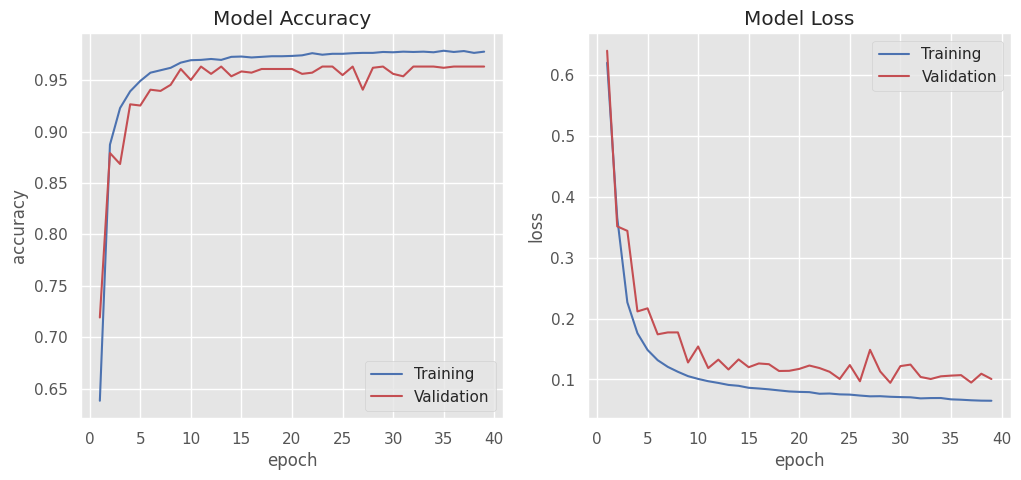

In [ ]:
#PLOT TRIAL 1
plt.style.use('ggplot')

def plot_history(history):
    acc = history1.history['accuracy']
    val_acc = history1.history['val_accuracy']
    loss = history1.history['loss']
    val_loss = history1.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training')
    plt.plot(x, val_acc, 'r', label='Validation')
    plt.title('Model Accuracy')
    plt.xlabel("epoch")
    plt.ylabel("accuracy")
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training')
    plt.plot(x, val_loss, 'r', label='Validation')
    plt.title('Model Loss')
    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.legend()

plot_history(history1)

In [ ]:
#TRIAL 2
def reset_seeds():
   np.random.seed(0)
   python_random.seed(0)
   tf.random.set_seed(0)

reset_seeds()

model2 = Sequential()
model2.add(Dense(20, input_dim= Train_X2_rose.shape[1], activation='sigmoid'))
model2.add(Dense(1, activation='sigmoid'))
opt = Adam (learning_rate=0.01)
model2.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
model2.summary()

es = EarlyStopping(monitor="val_loss",mode='min',patience=10)
history2 = model2.fit(Train_X2_rose, Train_Y2_rose, epochs=1000, verbose=1,
                      validation_split=0.2, batch_size=32, callbacks =[es])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 20)                22500     
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
Total params: 22,521
Trainable params: 22,521
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
106/106 [==============================] - 1s 5ms/step - loss: 0.5473 - accuracy: 0.7138 - val_loss: 0.4576 - val_accuracy: 0.8649
Epoch 2/1000
106/106 [==============================] - 0s 2ms/step - loss: 0.2817 - accuracy: 0.9060 - val_loss: 0.2971 - val_accuracy: 0.8886
Epoch 3/1000
106/106 [==============================] - 0s 2ms/step - loss: 0.1906 - accuracy: 0.9342 - val_loss: 0.3241 - val_accuracy: 0.8720
Epoch 4/1000
1

In [ ]:
best_epochs2 = np.argmin(history2.history['val_loss']) + 1
best_epochs2

11

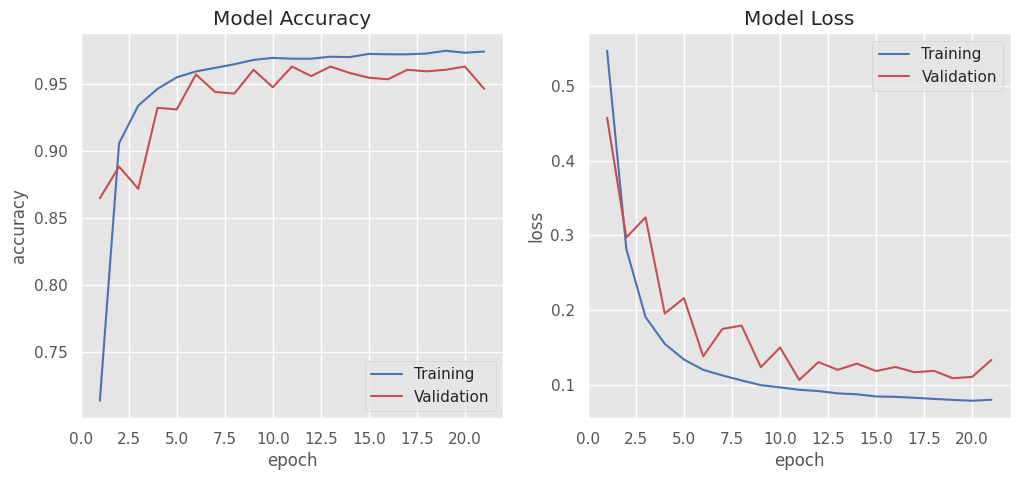

In [ ]:
#PLOT TRIAL 2
plt.style.use('ggplot')

def plot_history(history):
    acc = history2.history['accuracy']
    val_acc = history2.history['val_accuracy']
    loss = history2.history['loss']
    val_loss = history2.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training')
    plt.plot(x, val_acc, 'r', label='Validation')
    plt.title('Model Accuracy')
    plt.xlabel("epoch")
    plt.ylabel("accuracy")
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training')
    plt.plot(x, val_loss, 'r', label='Validation')
    plt.title('Model Loss')
    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.legend()

plot_history(history2)

In [ ]:
#TRIAL 3
def reset_seeds():
   np.random.seed(0)
   python_random.seed(0)
   tf.random.set_seed(0)

reset_seeds()

model3 = Sequential()
model3.add(Dense(30, input_dim= Train_X2_rose.shape[1], activation='sigmoid'))
model3.add(Dense(1, activation='sigmoid'))
opt = Adam (learning_rate=0.01)
model3.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
model3.summary()

es = EarlyStopping(monitor="val_loss",mode='min',patience=10)
history3 = model3.fit(Train_X2_rose, Train_Y2_rose, epochs=1000, verbose=1,
                      validation_split=0.2, batch_size=32,  callbacks =[es])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 30)                33750     
                                                                 
 dense_9 (Dense)             (None, 1)                 31        
                                                                 
Total params: 33,781
Trainable params: 33,781
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
106/106 [==============================] - 2s 5ms/step - loss: 0.5285 - accuracy: 0.7396 - val_loss: 0.3969 - val_accuracy: 0.8827
Epoch 2/1000
106/106 [==============================] - 0s 3ms/step - loss: 0.2583 - accuracy: 0.9110 - val_loss: 0.2828 - val_accuracy: 0.8874
Epoch 3/1000
106/106 [==============================] - 0s 3ms/step - loss: 0.1784 - accuracy: 0.9365 - val_loss: 0.3016 - val_accuracy: 0.8791
Epoch 4/1000
1

In [ ]:
best_epochs3 = np.argmin(history3.history['val_loss']) + 1
best_epochs3

11

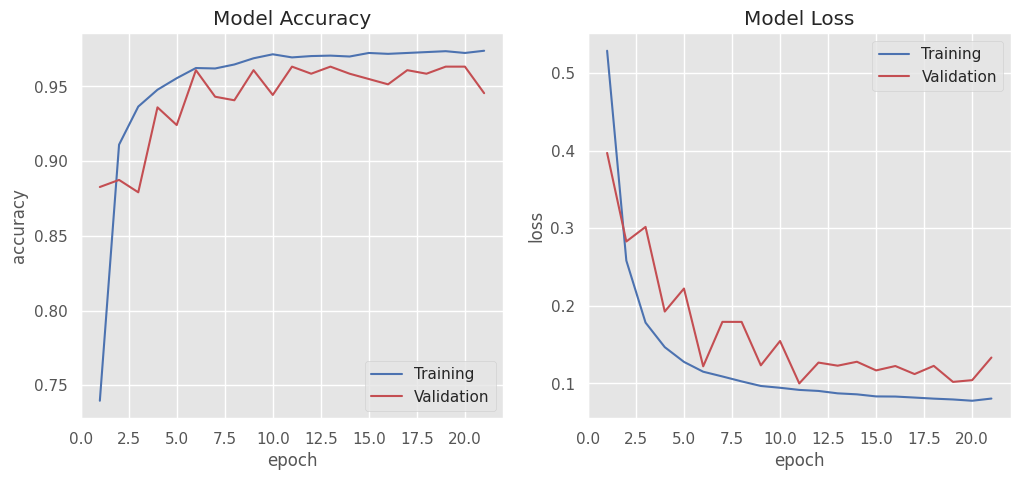

In [ ]:
#PLOT TRIAL 3
plt.style.use('ggplot')

def plot_history(history):
    acc = history3.history['accuracy']
    val_acc = history3.history['val_accuracy']
    loss = history3.history['loss']
    val_loss = history3.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training')
    plt.plot(x, val_acc, 'r', label='Validation')
    plt.title('Model Accuracy')
    plt.xlabel("epoch")
    plt.ylabel("accuracy")
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training')
    plt.plot(x, val_loss, 'r', label='Validation')
    plt.title('Model Loss')
    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.legend()

plot_history(history3)

In [ ]:
#TRIAL 4
def reset_seeds():
   np.random.seed(0)
   python_random.seed(0)
   tf.random.set_seed(0)

reset_seeds()

model4 = Sequential()
model4.add(Dense(10, input_dim= Train_X2_Tfidf.shape[1], activation='sigmoid'))
model4.add(Dense(1, activation='sigmoid'))
opt = Adam (learning_rate=0.001)
model4.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
model4.summary()

es = EarlyStopping(monitor="val_loss",mode='min',patience=10)
history4 = model4.fit(Train_X2_Tfidf, Train_Y2, epochs=1000, verbose=1,
                      validation_split=0.2, batch_size=32, callbacks =[es])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                11250     
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 11,261
Trainable params: 11,261
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
72/72 [==============================] - 2s 7ms/step - loss: 0.8977 - accuracy: 0.2627 - val_loss: 0.8027 - val_accuracy: 0.2753
Epoch 2/1000
72/72 [==============================] - 0s 4ms/step - loss: 0.7453 - accuracy: 0.2641 - val_loss: 0.6912 - val_accuracy: 0.3537
Epoch 3/1000
72/72 [==============================] - 0s 3ms/step - loss: 0.6558 - accuracy: 0.7603 - val_loss: 0.6276 - val_accuracy: 0.7247
Epoch 4/1000
72/72 [

In [ ]:
best_epochs4 = np.argmin(history4.history['val_loss']) + 1
best_epochs4

64

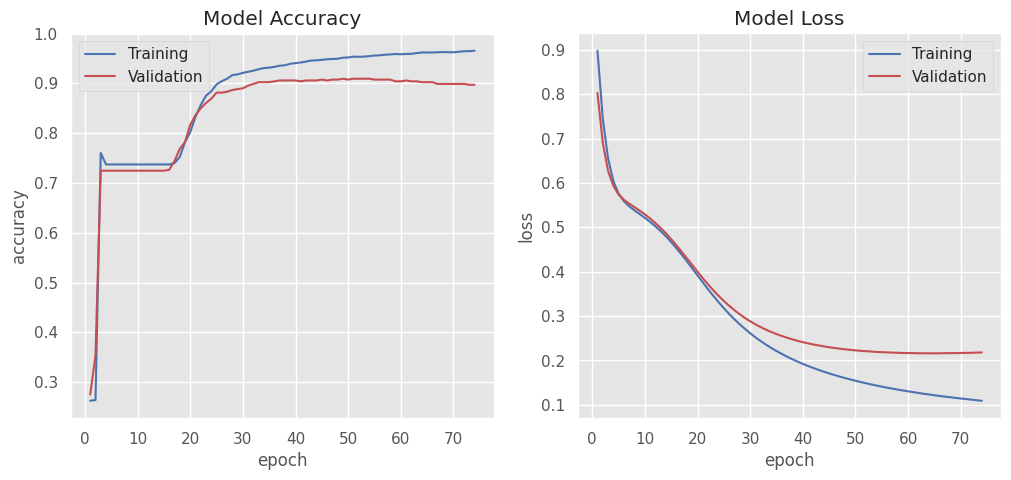

In [ ]:
#PLOT TRIAL 4
plt.style.use('ggplot')

def plot_history(history):
    acc = history4.history['accuracy']
    val_acc = history4.history['val_accuracy']
    loss = history4.history['loss']
    val_loss = history4.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training')
    plt.plot(x, val_acc, 'r', label='Validation')
    plt.title('Model Accuracy')
    plt.xlabel("epoch")
    plt.ylabel("accuracy")
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training')
    plt.plot(x, val_loss, 'r', label='Validation')
    plt.title('Model Loss')
    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.legend()

plot_history(history4)

In [ ]:
#TRIAL 5
def reset_seeds():
   np.random.seed(0)
   python_random.seed(0)
   tf.random.set_seed(0)

reset_seeds()

model5 = Sequential()
model5.add(Dense(20, input_dim= Train_X2_Tfidf.shape[1], activation='sigmoid'))
model5.add(Dense(1, activation='sigmoid'))
opt = Adam (learning_rate=0.001)
model5.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
model5.summary()

es = EarlyStopping(monitor="val_loss",mode='min',patience=10)
history5 = model5.fit(Train_X2_Tfidf, Train_Y2, epochs=1000, verbose=1,
                      validation_split=0.2, batch_size=32, callbacks =[es])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 20)                22500     
                                                                 
 dense_11 (Dense)            (None, 1)                 21        
                                                                 
Total params: 22,521
Trainable params: 22,521
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
72/72 [==============================] - 1s 3ms/step - loss: 0.8945 - accuracy: 0.2627 - val_loss: 0.7367 - val_accuracy: 0.2753
Epoch 2/1000
72/72 [==============================] - 0s 2ms/step - loss: 0.6568 - accuracy: 0.6357 - val_loss: 0.6027 - val_accuracy: 0.7247
Epoch 3/1000
72/72 [==============================] - 0s 2ms/step - loss: 0.5703 - accuracy: 0.7373 - val_loss: 0.5580 - val_accuracy: 0.7247
Epoch 4/1000
72/72 [

In [ ]:
best_epochs5 = np.argmin(history5.history['val_loss']) + 1
best_epochs5

49

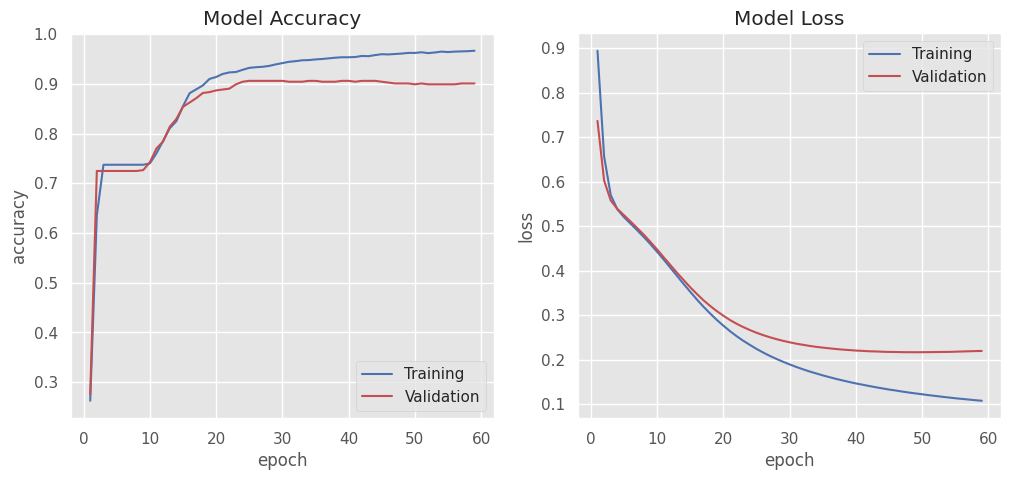

In [ ]:
#PLOT TRIAL 5
plt.style.use('ggplot')

def plot_history(history):
    acc = history5.history['accuracy']
    val_acc = history5.history['val_accuracy']
    loss = history5.history['loss']
    val_loss = history5.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training')
    plt.plot(x, val_acc, 'r', label='Validation')
    plt.title('Model Accuracy')
    plt.xlabel("epoch")
    plt.ylabel("accuracy")
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training')
    plt.plot(x, val_loss, 'r', label='Validation')
    plt.title('Model Loss')
    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.legend()

plot_history(history5)

In [ ]:
#TRIAL 6
def reset_seeds():
   np.random.seed(0)
   python_random.seed(0)
   tf.random.set_seed(0)

reset_seeds()

model6 = Sequential()
model6.add(Dense(30, input_dim= Train_X2_rose.shape[1], activation='sigmoid'))
model6.add(Dense(1, activation='sigmoid'))
opt = Adam (learning_rate=0.001)
model6.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
model6.summary()

es = EarlyStopping(monitor="val_loss",mode='min',patience=10)
history6 = model6.fit(Train_X2_rose, Train_Y2_rose, epochs=1000, verbose=1,
                      validation_split=0.2, batch_size=32, callbacks =[es])

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 30)                33750     
                                                                 
 dense_17 (Dense)            (None, 1)                 31        
                                                                 
Total params: 33,781
Trainable params: 33,781
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
106/106 [==============================] - 1s 3ms/step - loss: 0.7798 - accuracy: 0.4695 - val_loss: 0.7304 - val_accuracy: 0.0818
Epoch 2/1000
106/106 [==============================] - 0s 2ms/step - loss: 0.6206 - accuracy: 0.6260 - val_loss: 0.8573 - val_accuracy: 0.0000e+00
Epoch 3/1000
106/106 [==============================] - 0s 2ms/step - loss: 0.5831 - accuracy: 0.6320 - val_loss: 0.8203 - val_accuracy: 0.0284
Epoch 4/1

In [ ]:
best_epochs6 = np.argmin(history6.history['val_loss']) + 1
best_epochs6

85

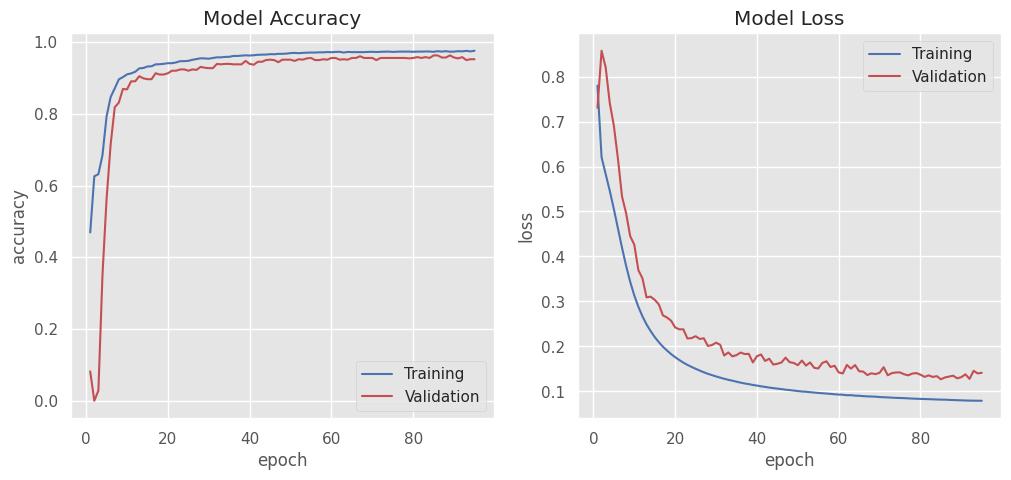

In [ ]:
#PLOT TRIAL 6
plt.style.use('ggplot')

def plot_history(history):
    acc = history6.history['accuracy']
    val_acc = history6.history['val_accuracy']
    loss = history6.history['loss']
    val_loss = history6.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training')
    plt.plot(x, val_acc, 'r', label='Validation')
    plt.title('Model Accuracy')
    plt.xlabel("epoch")
    plt.ylabel("accuracy")
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training')
    plt.plot(x, val_loss, 'r', label='Validation')
    plt.title('Model Loss')
    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.legend()

plot_history(history6)

In [ ]:
#TRIAL 7
def reset_seeds():
   np.random.seed(0)
   python_random.seed(0)
   tf.random.set_seed(0)

reset_seeds()

model7 = Sequential()
model7.add(Dense(10, input_dim= Train_X2_rose.shape[1], activation='sigmoid'))
model7.add(Dense(1, activation='sigmoid'))
opt = Adam (learning_rate=0.0001)
model7.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
model7.summary()

es = EarlyStopping(monitor="val_loss",mode='min',patience=10)
history7 = model7.fit(Train_X2_rose, Train_Y2_rose, epochs=1000, verbose=1,
                      validation_split=0.2, batch_size=32, callbacks =[es])

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 10)                11250     
                                                                 
 dense_19 (Dense)            (None, 1)                 11        
                                                                 
Total params: 11,261
Trainable params: 11,261
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
106/106 [==============================] - 1s 4ms/step - loss: 0.8859 - accuracy: 0.3749 - val_loss: 0.3682 - val_accuracy: 1.0000
Epoch 2/1000
106/106 [==============================] - 0s 2ms/step - loss: 0.8628 - accuracy: 0.3749 - val_loss: 0.3884 - val_accuracy: 1.0000
Epoch 3/1000
106/106 [==============================] - 0s 2ms/step - loss: 0.8412 - accuracy: 0.3749 - val_loss: 0.4089 - val_accuracy: 1.0000
Epoch 4/1000


In [ ]:
best_epochs7 = np.argmin(history7.history['val_loss']) + 1
best_epochs7

1

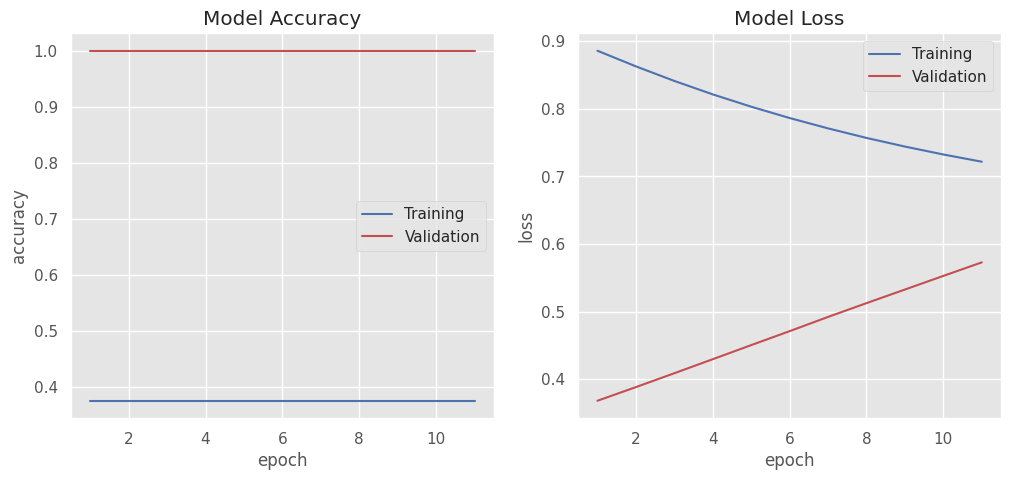

In [ ]:
#PLOT TRIAL 7
plt.style.use('ggplot')

def plot_history(history):
    acc = history7.history['accuracy']
    val_acc = history7.history['val_accuracy']
    loss = history7.history['loss']
    val_loss = history7.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training')
    plt.plot(x, val_acc, 'r', label='Validation')
    plt.title('Model Accuracy')
    plt.xlabel("epoch")
    plt.ylabel("accuracy")
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training')
    plt.plot(x, val_loss, 'r', label='Validation')
    plt.title('Model Loss')
    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.legend()

plot_history(history7)

In [ ]:
#TRIAL 8
def reset_seeds():
   np.random.seed(0)
   python_random.seed(0)
   tf.random.set_seed(0)

reset_seeds()

model8 = Sequential()
model8.add(Dense(20, input_dim= Train_X2_rose.shape[1], activation='sigmoid'))
model8.add(Dense(1, activation='sigmoid'))
opt = Adam (learning_rate=0.0001)
model8.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
model8.summary()

es = EarlyStopping(monitor="val_loss",mode='min',patience=10)
history8 = model8.fit(Train_X2_rose, Train_Y2_rose, epochs=1000, verbose=1,
                      validation_split=0.2, batch_size=32, callbacks =[es])

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 20)                22500     
                                                                 
 dense_21 (Dense)            (None, 1)                 21        
                                                                 
Total params: 22,521
Trainable params: 22,521
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
106/106 [==============================] - 1s 3ms/step - loss: 0.9389 - accuracy: 0.3749 - val_loss: 0.3275 - val_accuracy: 1.0000
Epoch 2/1000
106/106 [==============================] - 0s 2ms/step - loss: 0.8920 - accuracy: 0.3749 - val_loss: 0.3620 - val_accuracy: 1.0000
Epoch 3/1000
106/106 [==============================] - 0s 2ms/step - loss: 0.8502 - accuracy: 0.3749 - val_loss: 0.3976 - val_accuracy: 1.0000
Epoch 4/1000


In [ ]:
best_epochs8 = np.argmin(history8.history['val_loss']) + 1
best_epochs8

1

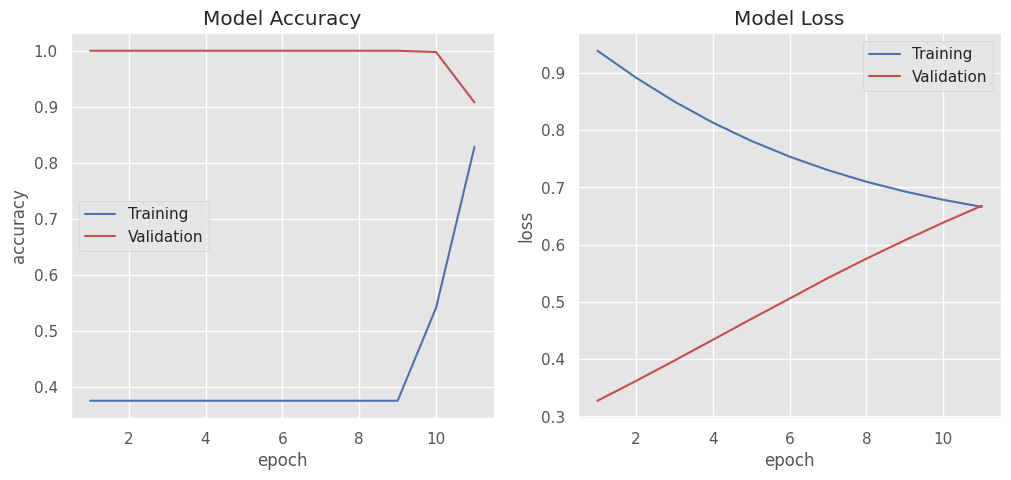

In [ ]:
#PLOT TRIAL 8
plt.style.use('ggplot')

def plot_history(history):
    acc = history8.history['accuracy']
    val_acc = history8.history['val_accuracy']
    loss = history8.history['loss']
    val_loss = history8.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training')
    plt.plot(x, val_acc, 'r', label='Validation')
    plt.title('Model Accuracy')
    plt.xlabel("epoch")
    plt.ylabel("accuracy")
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training')
    plt.plot(x, val_loss, 'r', label='Validation')
    plt.title('Model Loss')
    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.legend()

plot_history(history8)

In [ ]:
#TRIAL 9
def reset_seeds():
   np.random.seed(0)
   python_random.seed(0)
   tf.random.set_seed(0)

reset_seeds()

model9 = Sequential()
model9.add(Dense(30, input_dim= Train_X2_rose.shape[1], activation='sigmoid'))
model9.add(Dense(1, activation='sigmoid'))
opt = Adam (learning_rate=0.0001)
model9.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
model9.summary()

es = EarlyStopping(monitor="val_loss",mode='min',patience=10)
history9 = model9.fit(Train_X2_rose, Train_Y2_rose, epochs=1000, verbose=1,
                      validation_split=0.2, batch_size=32, callbacks =[es])

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 30)                33750     
                                                                 
 dense_23 (Dense)            (None, 1)                 31        
                                                                 
Total params: 33,781
Trainable params: 33,781
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
106/106 [==============================] - 1s 3ms/step - loss: 0.9923 - accuracy: 0.3749 - val_loss: 0.2977 - val_accuracy: 1.0000
Epoch 2/1000
106/106 [==============================] - 0s 2ms/step - loss: 0.9228 - accuracy: 0.3749 - val_loss: 0.3436 - val_accuracy: 1.0000
Epoch 3/1000
106/106 [==============================] - 0s 2ms/step - loss: 0.8628 - accuracy: 0.3749 - val_loss: 0.3920 - val_accuracy: 1.0000
Epoch 4/1000


In [ ]:
best_epochs9 = np.argmin(history9.history['val_loss']) + 1
best_epochs9

1

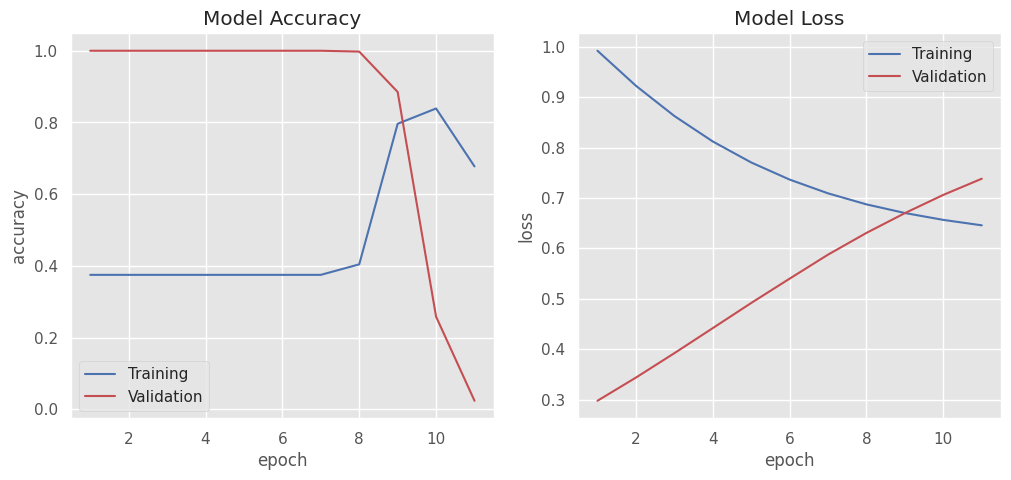

In [ ]:
#PLOT TRIAL 9
plt.style.use('ggplot')

def plot_history(history):
    acc = history9.history['accuracy']
    val_acc = history9.history['val_accuracy']
    loss = history9.history['loss']
    val_loss = history9.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training')
    plt.plot(x, val_acc, 'r', label='Validation')
    plt.title('Model Accuracy')
    plt.xlabel("epoch")
    plt.ylabel("accuracy")
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training')
    plt.plot(x, val_loss, 'r', label='Validation')
    plt.title('Model Loss')
    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.legend()

plot_history(history9)

In [ ]:
#TRIAL 10
def reset_seeds():
   np.random.seed(0)
   python_random.seed(0)
   tf.random.set_seed(0)

reset_seeds()

model10 = Sequential()
model10.add(Dense(10, input_dim= Train_X2_rose.shape[1], activation='sigmoid'))
model10.add(Dense(1, activation='sigmoid'))
opt = Adam (learning_rate=0.01)
model10.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
model10.summary()

es = EarlyStopping(monitor="val_loss",mode='min',patience=10)
history10 = model10.fit(Train_X2_rose, Train_Y2_rose, epochs=1000, verbose=1,
                        validation_split=0.2, batch_size=64, callbacks =[es])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                11250     
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 11,261
Trainable params: 11,261
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
53/53 [==============================] - 1s 8ms/step - loss: 0.6727 - accuracy: 0.5658 - val_loss: 0.8682 - val_accuracy: 0.0000e+00
Epoch 2/1000
53/53 [==============================] - 0s 3ms/step - loss: 0.5333 - accuracy: 0.7619 - val_loss: 0.6070 - val_accuracy: 0.7654
Epoch 3/1000
53/53 [==============================] - 0s 4ms/step - loss: 0.3678 - accuracy: 0.8989 - val_loss: 0.4000 - val_accuracy: 0.8709
Epoch 4/1000
53/53

In [ ]:
best_epochs10 = np.argmin(history10.history['val_loss']) + 1
best_epochs10

39

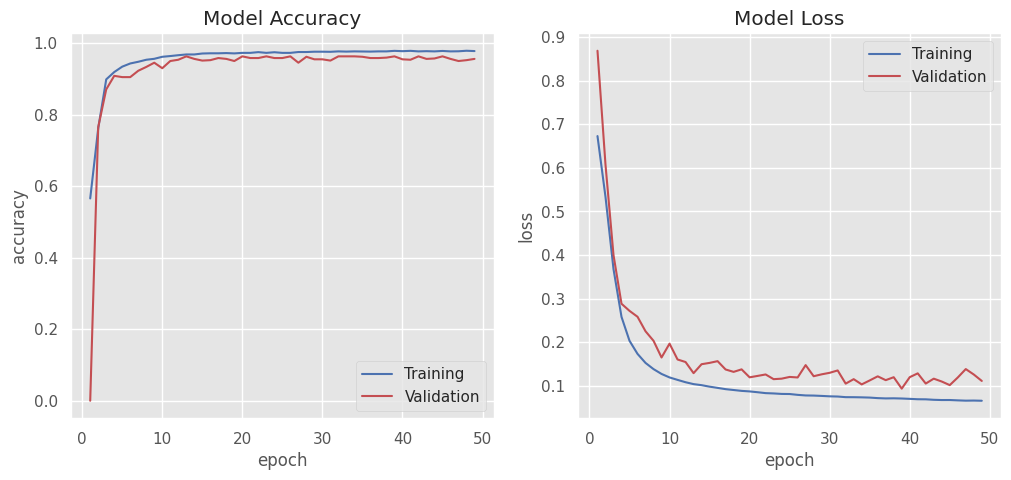

In [ ]:
#PLOT TRIAL 10
plt.style.use('ggplot')

def plot_history(history):
    acc = history10.history['accuracy']
    val_acc = history10.history['val_accuracy']
    loss = history10.history['loss']
    val_loss = history10.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training')
    plt.plot(x, val_acc, 'r', label='Validation')
    plt.title('Model Accuracy')
    plt.xlabel("epoch")
    plt.ylabel("accuracy")
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training')
    plt.plot(x, val_loss, 'r', label='Validation')
    plt.title('Model Loss')
    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.legend()

plot_history(history10)

In [ ]:
#TRIAL 11
def reset_seeds():
   np.random.seed(0)
   python_random.seed(0)
   tf.random.set_seed(0)

reset_seeds()

model11 = Sequential()
model11.add(Dense(20, input_dim= Train_X2_rose.shape[1], activation='sigmoid'))
model11.add(Dense(1, activation='sigmoid'))
opt = Adam (learning_rate=0.01)
model11.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
model11.summary()

es = EarlyStopping(monitor="val_loss",mode='min',patience=10)
history11 = model11.fit(Train_X2_rose, Train_Y2_rose, epochs=1000, verbose=1,
                        validation_split=0.2, batch_size=64, callbacks =[es])

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 20)                22500     
                                                                 
 dense_27 (Dense)            (None, 1)                 21        
                                                                 
Total params: 22,521
Trainable params: 22,521
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
53/53 [==============================] - 1s 7ms/step - loss: 0.6220 - accuracy: 0.6337 - val_loss: 0.6204 - val_accuracy: 0.7666
Epoch 2/1000
53/53 [==============================] - 0s 2ms/step - loss: 0.4131 - accuracy: 0.8826 - val_loss: 0.4390 - val_accuracy: 0.8566
Epoch 3/1000
53/53 [==============================] - 0s 2ms/step - loss: 0.2699 - accuracy: 0.9125 - val_loss: 0.3437 - val_accuracy: 0.8768
Epoch 4/1000
53/53 

In [ ]:
best_epochs11 = np.argmin(history11.history['val_loss']) + 1
best_epochs11

39

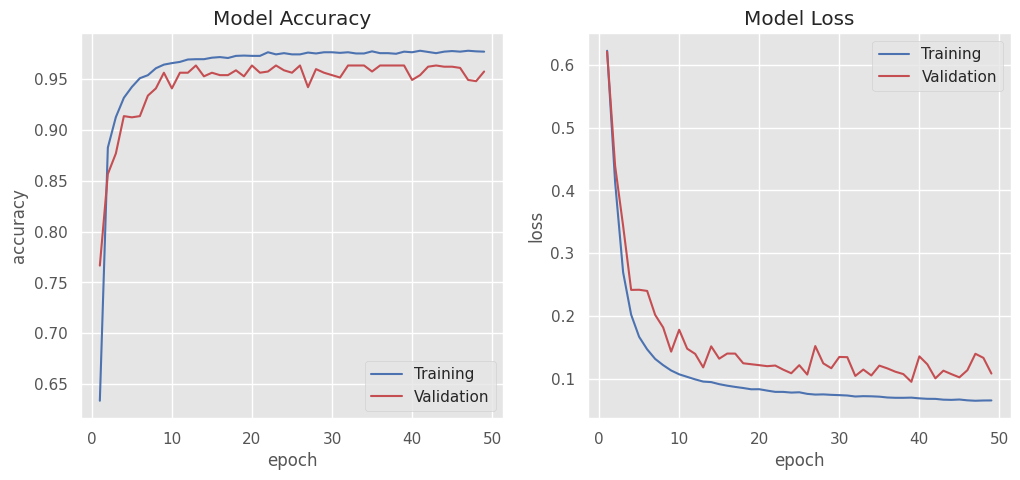

In [ ]:
#PLOT TRIAL 11
plt.style.use('ggplot')

def plot_history(history):
    acc = history11.history['accuracy']
    val_acc = history11.history['val_accuracy']
    loss = history11.history['loss']
    val_loss = history11.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training')
    plt.plot(x, val_acc, 'r', label='Validation')
    plt.title('Model Accuracy')
    plt.xlabel("epoch")
    plt.ylabel("accuracy")
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training')
    plt.plot(x, val_loss, 'r', label='Validation')
    plt.title('Model Loss')
    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.legend()

plot_history(history11)

In [ ]:
#TRIAL 12
def reset_seeds():
   np.random.seed(0)
   python_random.seed(0)
   tf.random.set_seed(0)

reset_seeds()

model12 = Sequential()
model12.add(Dense(30, input_dim= Train_X2_rose.shape[1], activation='sigmoid'))
model12.add(Dense(1, activation='sigmoid'))
opt = Adam (learning_rate=0.01)
model12.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
model12.summary()

es = EarlyStopping(monitor="val_loss",mode='min',patience=10)
history12 = model12.fit(Train_X2_rose, Train_Y2_rose, epochs=1000, verbose=1,
                        validation_split=0.2, batch_size=64, callbacks =[es])

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 30)                33750     
                                                                 
 dense_29 (Dense)            (None, 1)                 31        
                                                                 
Total params: 33,781
Trainable params: 33,781
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
53/53 [==============================] - 1s 8ms/step - loss: 0.6113 - accuracy: 0.6720 - val_loss: 0.6278 - val_accuracy: 0.7370
Epoch 2/1000
53/53 [==============================] - 0s 3ms/step - loss: 0.3759 - accuracy: 0.8873 - val_loss: 0.3970 - val_accuracy: 0.8673
Epoch 3/1000
53/53 [==============================] - 0s 2ms/step - loss: 0.2420 - accuracy: 0.9167 - val_loss: 0.3402 - val_accuracy: 0.8768
Epoch 4/1000
53/53 

In [ ]:
best_epochs12 = np.argmin(history12.history['val_loss']) + 1
best_epochs12

26

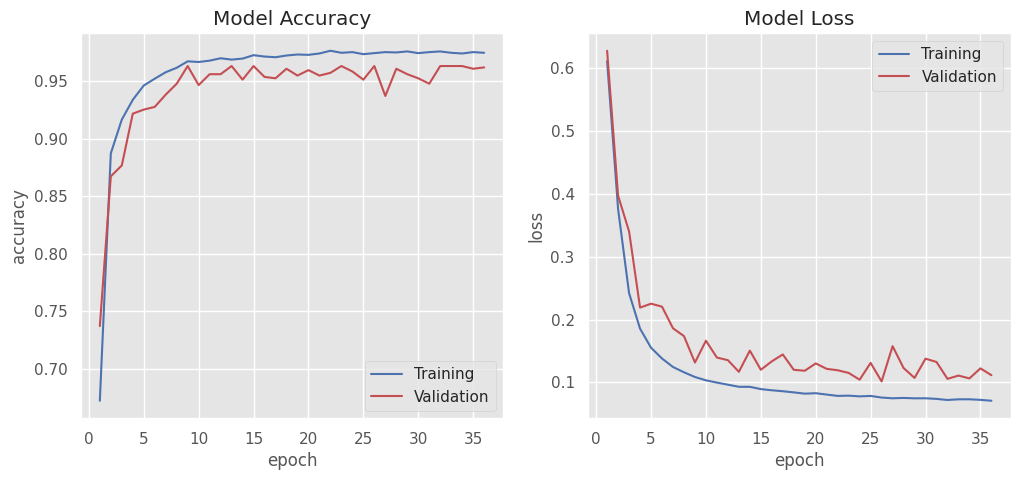

In [ ]:
#PLOT TRIAL 12
plt.style.use('ggplot')

def plot_history(history):
    acc = history12.history['accuracy']
    val_acc = history12.history['val_accuracy']
    loss = history12.history['loss']
    val_loss = history12.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training')
    plt.plot(x, val_acc, 'r', label='Validation')
    plt.title('Model Accuracy')
    plt.xlabel("epoch")
    plt.ylabel("accuracy")
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training')
    plt.plot(x, val_loss, 'r', label='Validation')
    plt.title('Model Loss')
    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.legend()

plot_history(history12)

In [ ]:
#TRIAL 13
def reset_seeds():
   np.random.seed(0)
   python_random.seed(0)
   tf.random.set_seed(0)

reset_seeds()

model13 = Sequential()
model13.add(Dense(10, input_dim= Train_X2_rose.shape[1], activation='sigmoid'))
model13.add(Dense(1, activation='sigmoid'))
opt = Adam (learning_rate=0.001)
model13.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
model13.summary()

es = EarlyStopping(monitor="val_loss",mode='min',patience=10)
history13 = model13.fit(Train_X2_rose, Train_Y2_rose, epochs=1000, verbose=1,
                        validation_split=0.2, batch_size=64, callbacks =[es])

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                11250     
                                                                 
 dense_13 (Dense)            (None, 1)                 11        
                                                                 
Total params: 11,261
Trainable params: 11,261
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
53/53 [==============================] - 1s 4ms/step - loss: 0.8420 - accuracy: 0.3749 - val_loss: 0.4553 - val_accuracy: 1.0000
Epoch 2/1000
53/53 [==============================] - 0s 2ms/step - loss: 0.7538 - accuracy: 0.3749 - val_loss: 0.5591 - val_accuracy: 1.0000
Epoch 3/1000
53/53 [==============================] - 0s 2ms/step - loss: 0.6989 - accuracy: 0.3918 - val_loss: 0.6529 - val_accuracy: 0.9953
Epoch 4/1000
53/53 [

In [ ]:
best_epochs13 = np.argmin(history13.history['val_loss']) + 1
best_epochs13

1

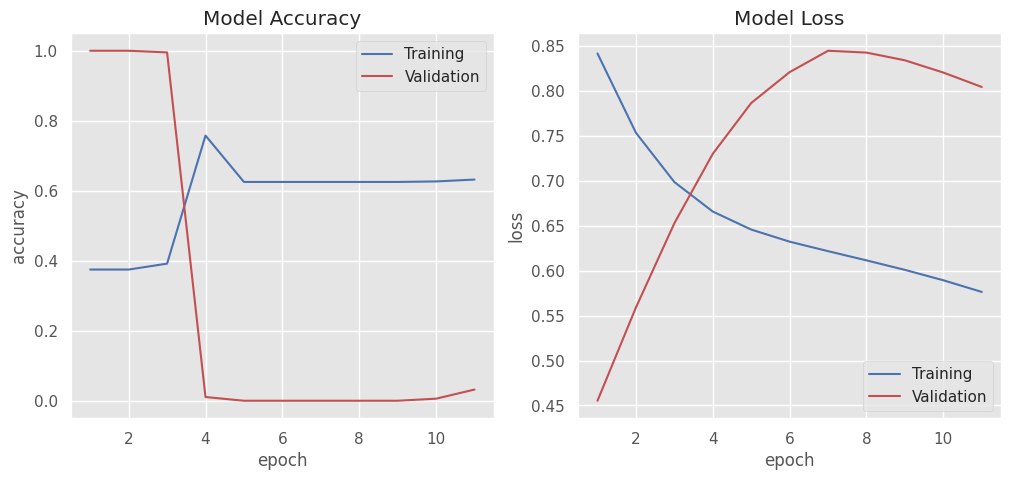

In [ ]:
#PLOT TRIAL 13
plt.style.use('ggplot')

def plot_history(history):
    acc = history13.history['accuracy']
    val_acc = history13.history['val_accuracy']
    loss = history13.history['loss']
    val_loss = history13.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training')
    plt.plot(x, val_acc, 'r', label='Validation')
    plt.title('Model Accuracy')
    plt.xlabel("epoch")
    plt.ylabel("accuracy")
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training')
    plt.plot(x, val_loss, 'r', label='Validation')
    plt.title('Model Loss')
    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.legend()

plot_history(history13)

In [ ]:
#TRIAL 14
def reset_seeds():
   np.random.seed(0)
   python_random.seed(0)
   tf.random.set_seed(0)

reset_seeds()

model14 = Sequential()
model14.add(Dense(20, input_dim= Train_X2_rose.shape[1], activation='sigmoid'))
model14.add(Dense(1, activation='sigmoid'))
opt = Adam (learning_rate=0.001)
model14.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
model14.summary()

es = EarlyStopping(monitor="val_loss",mode='min',patience=10)
history14 = model14.fit(Train_X2_rose, Train_Y2_rose, epochs=1000, verbose=1,
                        validation_split=0.2, batch_size=64, callbacks =[es])

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 20)                22500     
                                                                 
 dense_15 (Dense)            (None, 1)                 21        
                                                                 
Total params: 22,521
Trainable params: 22,521
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
53/53 [==============================] - 1s 4ms/step - loss: 0.8530 - accuracy: 0.3749 - val_loss: 0.4820 - val_accuracy: 1.0000
Epoch 2/1000
53/53 [==============================] - 0s 2ms/step - loss: 0.7042 - accuracy: 0.4543 - val_loss: 0.6537 - val_accuracy: 0.9562
Epoch 3/1000
53/53 [==============================] - 0s 3ms/step - loss: 0.6400 - accuracy: 0.7521 - val_loss: 0.7650 - val_accuracy: 0.0118
Epoch 4/1000
53/53 [

In [ ]:
best_epochs14 = np.argmin(history14.history['val_loss']) + 1
best_epochs14

1

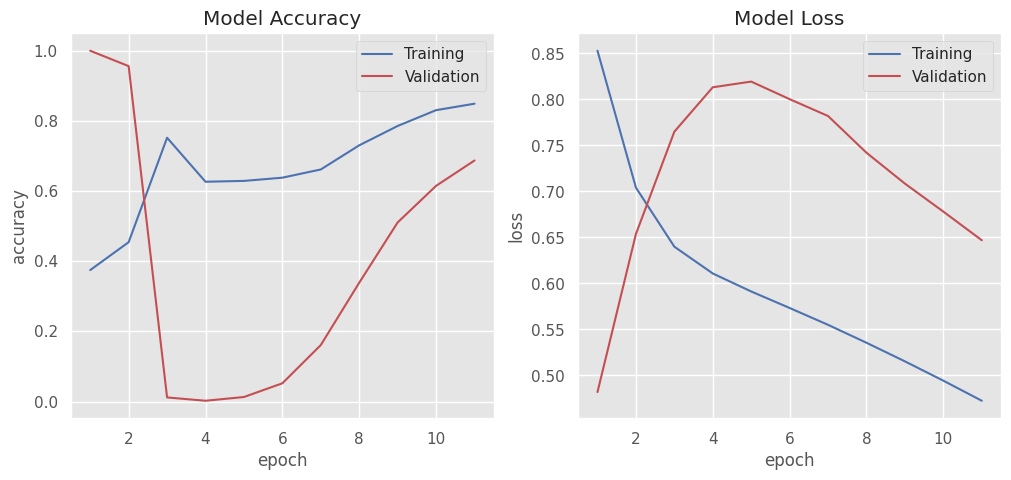

In [ ]:
#PLOT TRIAL 14
plt.style.use('ggplot')

def plot_history(history):
    acc = history14.history['accuracy']
    val_acc = history14.history['val_accuracy']
    loss = history14.history['loss']
    val_loss = history14.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training')
    plt.plot(x, val_acc, 'r', label='Validation')
    plt.title('Model Accuracy')
    plt.xlabel("epoch")
    plt.ylabel("accuracy")
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training')
    plt.plot(x, val_loss, 'r', label='Validation')
    plt.title('Model Loss')
    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.legend()

plot_history(history14)

In [ ]:
#TRIAL 15
def reset_seeds():
   np.random.seed(0)
   python_random.seed(0)
   tf.random.set_seed(0)

reset_seeds()

model15 = Sequential()
model15.add(Dense(30, input_dim= Train_X2_Tfidf.shape[1], activation='sigmoid'))
model15.add(Dense(1, activation='sigmoid'))
opt = Adam (learning_rate=0.001)
model15.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
model15.summary()

es = EarlyStopping(monitor="val_loss",mode='min',patience=10)
history15 = model15.fit(Train_X2_Tfidf, Train_Y2, epochs=1000, verbose=1,
                        validation_split=0.2, batch_size=64, callbacks =[es])

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 30)                33750     
                                                                 
 dense_31 (Dense)            (None, 1)                 31        
                                                                 
Total params: 33,781
Trainable params: 33,781
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
36/36 [==============================] - 1s 8ms/step - loss: 1.0159 - accuracy: 0.2627 - val_loss: 0.8639 - val_accuracy: 0.2753
Epoch 2/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.7732 - accuracy: 0.2632 - val_loss: 0.6915 - val_accuracy: 0.3624
Epoch 3/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.6424 - accuracy: 0.7538 - val_loss: 0.6064 - val_accuracy: 0.7247
Epoch 4/1000
36/36 

In [ ]:
best_epochs15 = np.argmin(history15.history['val_loss']) + 1
best_epochs15

72

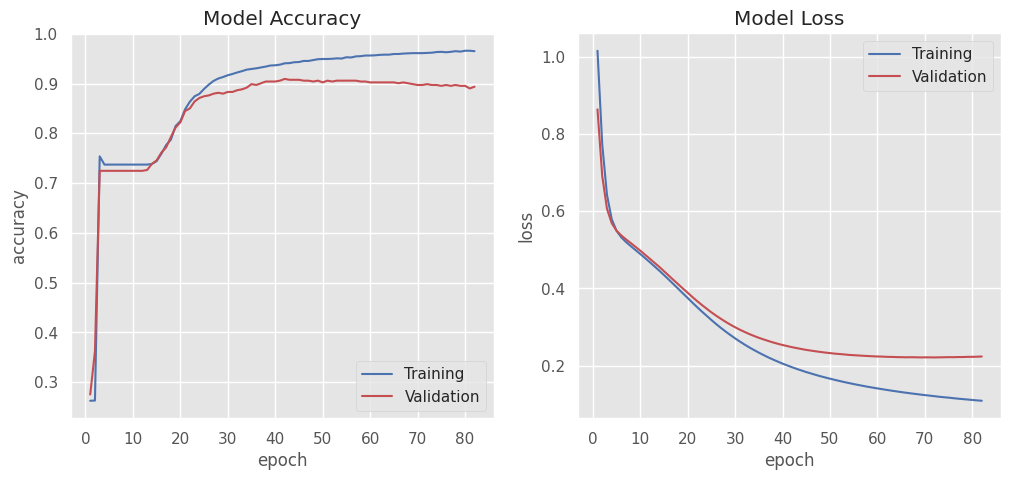

In [ ]:
#PLOT TRIAL 15
plt.style.use('ggplot')

def plot_history(history):
    acc = history15.history['accuracy']
    val_acc = history15.history['val_accuracy']
    loss = history15.history['loss']
    val_loss = history15.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training')
    plt.plot(x, val_acc, 'r', label='Validation')
    plt.title('Model Accuracy')
    plt.xlabel("epoch")
    plt.ylabel("accuracy")
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training')
    plt.plot(x, val_loss, 'r', label='Validation')
    plt.title('Model Loss')
    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.legend()

plot_history(history15)

In [ ]:
#TRIAL 16
def reset_seeds():
   np.random.seed(0)
   python_random.seed(0)
   tf.random.set_seed(0)

reset_seeds()

model16 = Sequential()
model16.add(Dense(10, input_dim= Train_X2_Tfidf.shape[1], activation='sigmoid'))
model16.add(Dense(1, activation='sigmoid'))
opt = Adam (learning_rate=0.0001)
model16.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
model16.summary()

es = EarlyStopping(monitor="val_loss",mode='min',patience=10)
history16 = model16.fit(Train_X2_Tfidf, Train_Y2, epochs=1000, verbose=1,
                        validation_split=0.2, batch_size=64, callbacks =[es])

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_54 (Dense)            (None, 10)                11250     
                                                                 
 dense_55 (Dense)            (None, 1)                 11        
                                                                 
Total params: 11,261
Trainable params: 11,261
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2000
36/36 [==============================] - 1s 8ms/step - loss: 0.9888 - accuracy: 0.2627 - val_loss: 0.9713 - val_accuracy: 0.2753
Epoch 2/2000
36/36 [==============================] - 0s 3ms/step - loss: 0.9769 - accuracy: 0.2627 - val_loss: 0.9603 - val_accuracy: 0.2753
Epoch 3/2000
36/36 [==============================] - 0s 4ms/step - loss: 0.9658 - accuracy: 0.2627 - val_loss: 0.9497 - val_accuracy: 0.2753
Epoch 4/2000
36/36 

In [ ]:
best_epochs16 = np.argmin(history16.history['val_loss']) + 1
best_epochs16

847

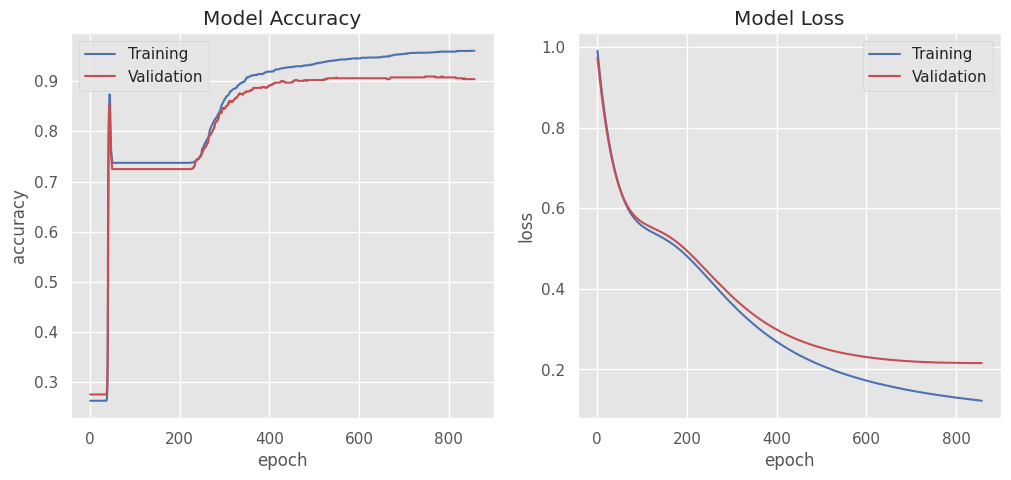

In [ ]:
#PLOT TRIAL 16
plt.style.use('ggplot')

def plot_history(history):
    acc = history16.history['accuracy']
    val_acc = history16.history['val_accuracy']
    loss = history16.history['loss']
    val_loss = history16.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training')
    plt.plot(x, val_acc, 'r', label='Validation')
    plt.title('Model Accuracy')
    plt.xlabel("epoch")
    plt.ylabel("accuracy")
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training')
    plt.plot(x, val_loss, 'r', label='Validation')
    plt.title('Model Loss')
    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.legend()

plot_history(history16)

In [ ]:
#TRIAL 17
def reset_seeds():
   np.random.seed(0)
   python_random.seed(0)
   tf.random.set_seed(0)

reset_seeds()

model17 = Sequential()
model17.add(Dense(20, input_dim= Train_X2_Tfidf.shape[1], activation='sigmoid'))
model17.add(Dense(1, activation='sigmoid'))
opt = Adam (learning_rate=0.0001)
model17.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
model17.summary()

es = EarlyStopping(monitor="val_loss",mode='min',patience=10)
history17 = model17.fit(Train_X2_Tfidf, Train_Y2, epochs=1000, verbose=1,
                        validation_split=0.2, batch_size=64, callbacks =[es])

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 20)                22500     
                                                                 
 dense_35 (Dense)            (None, 1)                 21        
                                                                 
Total params: 22,521
Trainable params: 22,521
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
36/36 [==============================] - 1s 9ms/step - loss: 1.0725 - accuracy: 0.2627 - val_loss: 1.0478 - val_accuracy: 0.2753
Epoch 2/1000
36/36 [==============================] - 0s 4ms/step - loss: 1.0492 - accuracy: 0.2627 - val_loss: 1.0256 - val_accuracy: 0.2753
Epoch 3/1000
36/36 [==============================] - 0s 4ms/step - loss: 1.0267 - accuracy: 0.2627 - val_loss: 1.0039 - val_accuracy: 0.2753
Epoch 4/1000
36/36 

In [ ]:
best_epochs17 = np.argmin(history17.history['val_loss']) + 1
best_epochs17

610

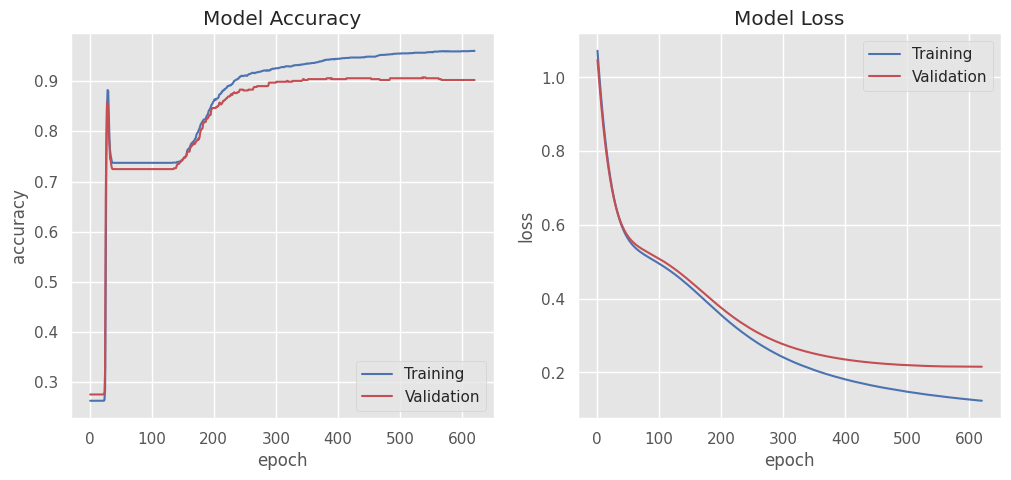

In [ ]:
#PLOT TRIAL 17
plt.style.use('ggplot')

def plot_history(history):
    acc = history17.history['accuracy']
    val_acc = history17.history['val_accuracy']
    loss = history17.history['loss']
    val_loss = history17.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training')
    plt.plot(x, val_acc, 'r', label='Validation')
    plt.title('Model Accuracy')
    plt.xlabel("epoch")
    plt.ylabel("accuracy")
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training')
    plt.plot(x, val_loss, 'r', label='Validation')
    plt.title('Model Loss')
    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.legend()

plot_history(history17)

In [ ]:
#TRIAL 18
def reset_seeds():
   np.random.seed(0)
   python_random.seed(0)
   tf.random.set_seed(0)

reset_seeds()

model18 = Sequential()
model18.add(Dense(30, input_dim= Train_X2_Tfidf.shape[1], activation='sigmoid'))
model18.add(Dense(1, activation='sigmoid'))
opt = Adam (learning_rate=0.0001)
model18.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
model18.summary()

es = EarlyStopping(monitor="val_loss",mode='min',patience=10)
history18 = model18.fit(Train_X2_Tfidf, Train_Y2, epochs=1000, verbose=1,
                        validation_split=0.2, batch_size=64, callbacks =[es])

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 30)                33750     
                                                                 
 dense_37 (Dense)            (None, 1)                 31        
                                                                 
Total params: 33,781
Trainable params: 33,781
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
36/36 [==============================] - 1s 9ms/step - loss: 1.1521 - accuracy: 0.2627 - val_loss: 1.1196 - val_accuracy: 0.2753
Epoch 2/1000
36/36 [==============================] - 0s 5ms/step - loss: 1.1176 - accuracy: 0.2627 - val_loss: 1.0868 - val_accuracy: 0.2753
Epoch 3/1000
36/36 [==============================] - 0s 4ms/step - loss: 1.0846 - accuracy: 0.2627 - val_loss: 1.0550 - val_accuracy: 0.2753
Epoch 4/1000
36/36 

In [ ]:
best_epochs18 = np.argmin(history18.history['val_loss']) + 1
best_epochs18

525

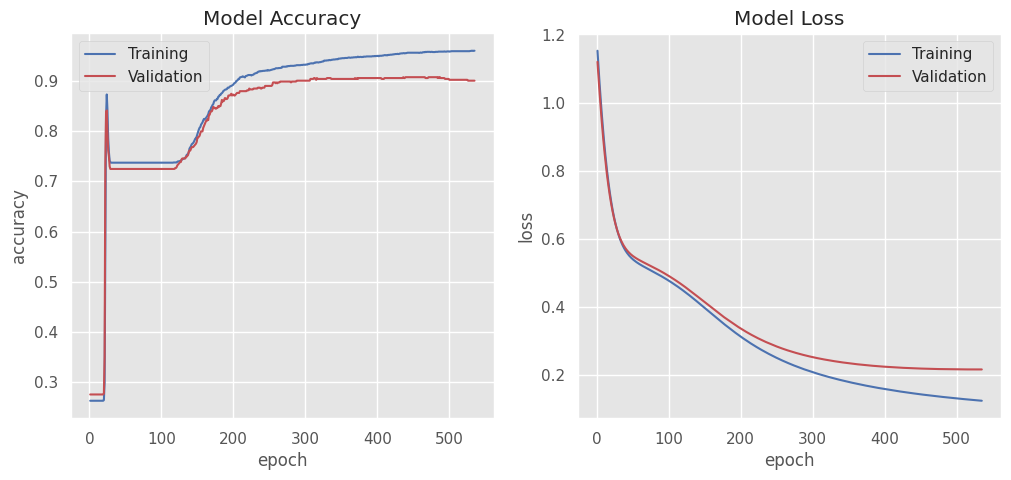

In [ ]:
#PLOT TRIAL 18
plt.style.use('ggplot')

def plot_history(history):
    acc = history18.history['accuracy']
    val_acc = history18.history['val_accuracy']
    loss = history18.history['loss']
    val_loss = history18.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training')
    plt.plot(x, val_acc, 'r', label='Validation')
    plt.title('Model Accuracy')
    plt.xlabel("epoch")
    plt.ylabel("accuracy")
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training')
    plt.plot(x, val_loss, 'r', label='Validation')
    plt.title('Model Loss')
    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.legend()

plot_history(history18)

Model terbaik ditentukan berdasarkan model
yang memiliki nilai validation loss terendah dari 18 Trial yang telah dilakukan
sebelumnya. Maka model terbaik dihasilkan pada data latih setelah
resampling Model Trial 10 dengan validation loss terkecil sebesar 0,0939 dengan
ANN node hidden layer sebanyak 10, learning rate sebesar 0,01 dan batch size
sebanyak 64

# Confusion Matrix

23/23 [==============================] - 0s 5ms/step
[[137  51]
 [ 43 487]]
              precision    recall  f1-score   support

           0       0.76      0.73      0.74       188
           1       0.91      0.92      0.91       530

    accuracy                           0.87       718
   macro avg       0.83      0.82      0.83       718
weighted avg       0.87      0.87      0.87       718

Confusion matrix:


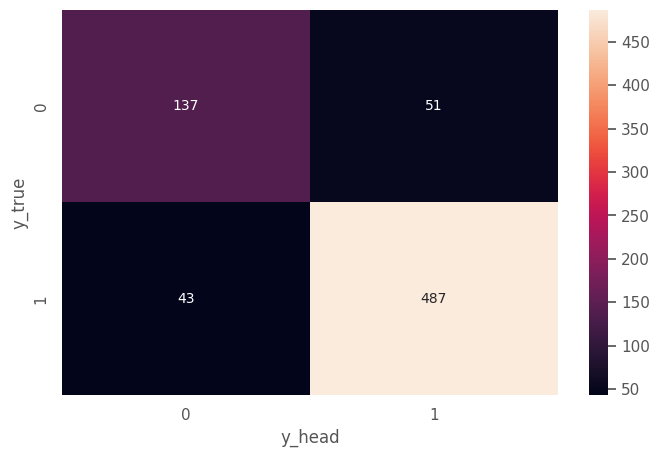

In [ ]:
y_pred = model10.predict(Test_X2_Tfidf) > 0.5

print(confusion_matrix(Test_Y2, y_pred))
print(classification_report(Test_Y2, y_pred))
print('Confusion matrix:')
confusion_matrix(Test_Y2, y_pred)
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(Test_Y2, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_head")
plt.ylabel("y_true")
plt.show()

cm = confusion_matrix(Test_Y2, y_pred)

137 ulasan negatif diklasifikasikan dengan
benar (True Negatif) sementara 51 ulasan negatif salah diklasifikasikan menjadi
positif (False Positive). Selanjutnya sebanyak 487 ulasan positif diklasifikasikan
dengan benar (True Positif) sementara 43 ulasan positif salah diklasifikasikan
menjadi negatif (False Negative).

Tingkat akurasi diperoleh sebesar 87%. Hasil perhitungan akurasi
menunjukkan bahwa model Artificial Neural Network dengan optimasi adam yang
dibangun dapat mengklasifikasikan dengan benar 87% data ulasan pengguna
terhadap aplikasi Microsoft Teams

# Wordcloud Sentimen Positif

In [ ]:
ReviewPositif = dataset.loc[dataset['sentimen']==1]
ReviewPositif

,review,sentimen,review_join
0,"['jaring', 'stabil', 'aplikasi', 'stabil']",1,jaring stabil aplikasi stabil
1,"['masuk', 'masuk', 'tekan', 'taut', 'temu']",1,masuk masuk tekan taut temu
3,"['bagus', 'tingkat', 'fitur', 'tampil']",1,bagus tingkat fitur tampil
4,['bagus'],1,bagus
5,"['oke', 'bagus']",1,oke bagus
...,...,...,...
3579,"['aplikasi', 'bagus', 'buka', 'muat', 'muat', ...",1,aplikasi bagus buka muat muat selesai aplikasi...
3582,['bagus'],1,bagus
3583,"['coba', 'kali', 'kode', 'kirim', 'nomor', 'te...",1,coba kali kode kirim nomor telepon
3585,['mantap'],1,mantap


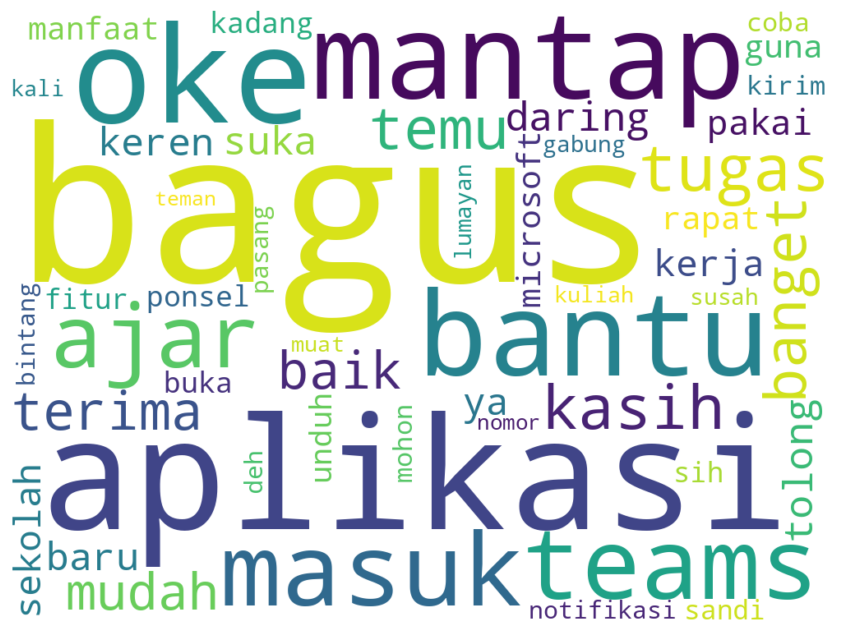

In [ ]:
review_pos = ReviewPositif['review']
import string
table = str.maketrans('', '', string.punctuation)
strippedpos = [w.translate(table) for w in review_pos]
all_review_positif = ' '.join(str(word) for word in strippedpos)
wordcloud = WordCloud(max_font_size=260, max_words=50, width=1000, height=750,
                      mode='RGBA', background_color='white', collocations=False)
wordcloud.generate(all_review_positif )

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

# Wordcloud Sentimen Negatif

In [ ]:
ReviewNegatif = dataset.loc[dataset['sentimen']==0]
ReviewNegatif

,review,sentimen,review_join
2,"['chat', 'ponsel', 'minggu', 'ponsel', 'ribet'...",0,chat ponsel minggu ponsel ribet laptop
6,"['ganggu', 'banget']",0,ganggu banget
11,"['hi', 'teams', 'kolega', 'kirim', 'chat', 'te...",0,hi teams kolega kirim chat teams terima chat t...
23,['tahi'],0,tahi
26,"['aplikasi', 'dukung', 'eror', 'lepas', 'unduh...",0,aplikasi dukung eror lepas unduh kadang unduh ...
...,...,...,...
3564,"['alami', 'muat']",0,alami muat
3575,"['muat', 'ya']",0,muat ya
3580,"['kerja', 'masuk', 'susah', 'lapor', 'guru']",0,kerja masuk susah lapor guru
3581,"['aplikasi', 'jelek', 'akun', 'sulit', 'ampun']",0,aplikasi jelek akun sulit ampun


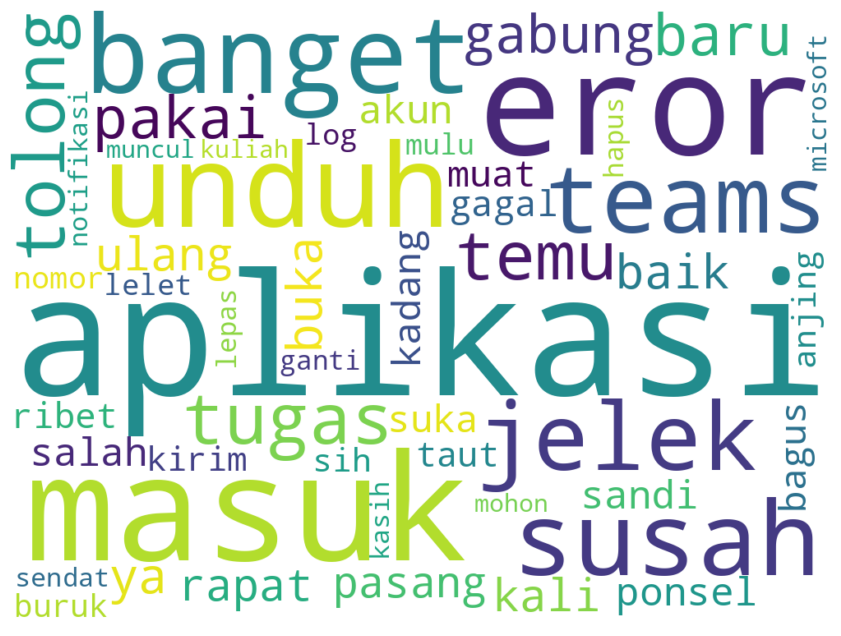

In [ ]:
review_neg = ReviewNegatif['review']
table = str.maketrans('', '', string.punctuation)
strippedneg = [w.translate(table) for w in review_neg]
all_review_negatif = ' '.join(str(word) for word in strippedneg)
wordcloud = WordCloud(max_font_size=260, max_words=50, width=1000, height=750,
                      mode='RGBA', background_color='white', collocations=False)
wordcloud.generate(all_review_negatif)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()